In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
X = maternal_health_risk.data.features 
y = maternal_health_risk.data.targets 

# create a dataframe to combine features and targets for plotting
df = pd.merge(X, y, left_index=True, right_index=True)
  

| Variable Name | Role     | Type     | Demographic | Description                                                                             | Units  | Missing Values |
|---------------|----------|----------|-------------|-----------------------------------------------------------------------------------------|--------|----------------|
| Age           | Feature  | Integer  | Age         | Any ages in years when a woman is pregnant.                                              |        | no             |
| SystolicBP    | Feature  | Integer  |             | Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.    | mmHg   | no             |
| DiastolicBP   | Feature  | Integer  |             | Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.    | mmHg   | no             |
| BS            | Feature  | Integer  |             | Blood glucose levels in terms of a molar concentration.                                  | mmol/L | no             |
| BodyTemp      | Feature  | Integer  |             | Body temperature in degrees Fahrenheit (F).                                              | F      | no             |
| HeartRate     | Feature  | Integer  |             | A normal resting heart rate.                                                             | bpm    | no             |
| RiskLevel     | Target   | Categorical |         | Predicted Risk Intensity Level during pregnancy considering the previous attribute.       |        | no             |


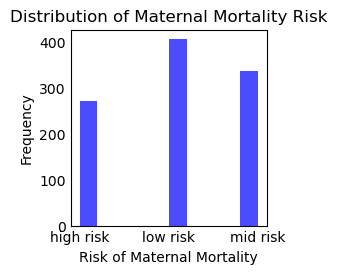

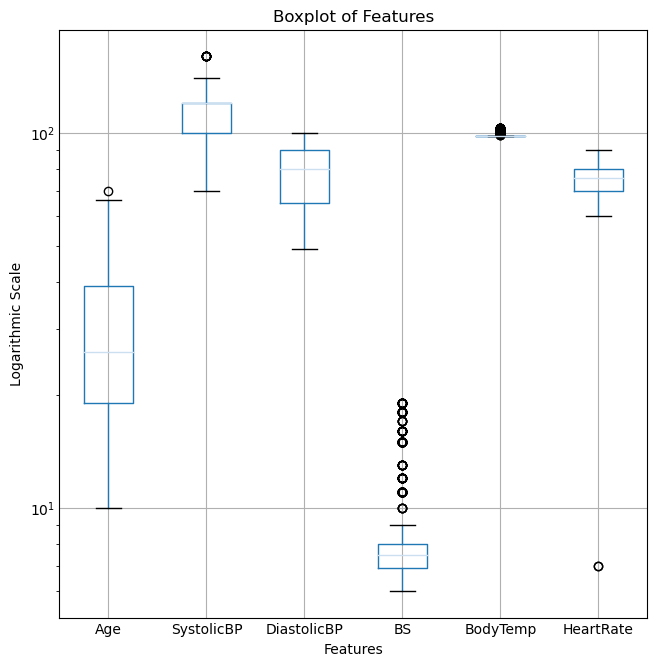

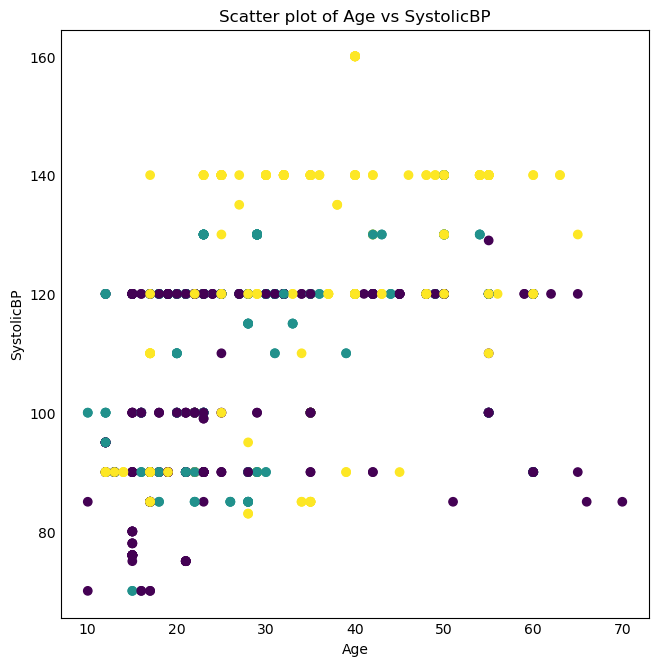

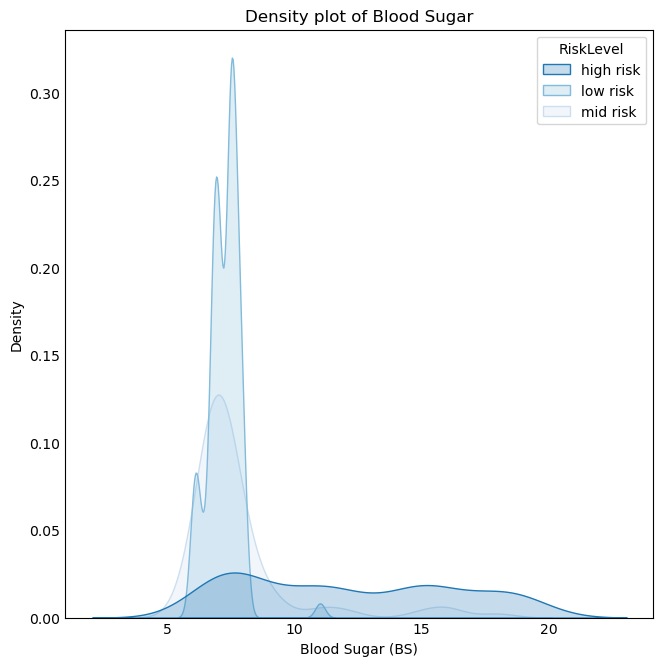

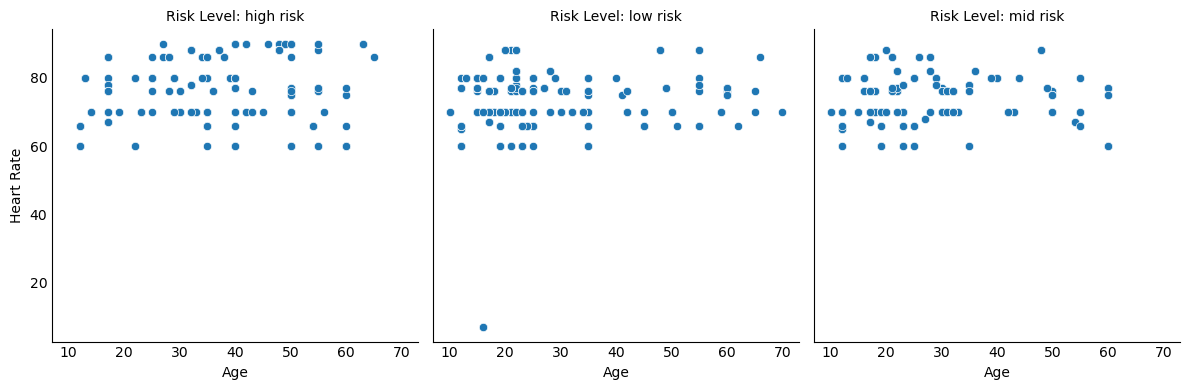

In [4]:
# plot histogram for the target variable
plt.style.use('_mpl-gallery-nogrid')
fig, ax = plt.subplots()
ax.hist(y, bins=10, color='blue', alpha=0.7)
ax.set_xlabel('Risk of Maternal Mortality')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Maternal Mortality Risk')
plt.show()

# plot boxplot for the features
fig, ax = plt.subplots(figsize=(6, 6))
df.boxplot(column=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], ax=ax)
ax.set_yscale('log')
ax.set_title('Boxplot of Features')
ax.set_ylabel('Logarithmic Scale')
ax.set_xlabel('Features')
ax.set_xticklabels(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])
plt.show()

# Convert categorical values to numeric
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
y_numeric = y['RiskLevel'].map(risk_mapping)


# Plot scatter plot with numeric values
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=X['Age'], y=X['SystolicBP'], c=y_numeric, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('SystolicBP')
ax.set_title('Scatter plot of Age vs SystolicBP')
plt.show()

plt.figure(figsize=(6, 6))
sns.kdeplot(data=df, x='BS', hue='RiskLevel', fill=True)
plt.title('Density plot of Blood Sugar')
plt.xlabel('Blood Sugar (BS)')
plt.ylabel('Density')
plt.show()



g = sns.FacetGrid(data=df, col='RiskLevel', height=4, aspect=1)
g.map(sns.scatterplot, "Age", "HeartRate")
g.set_axis_labels("Age","Heart Rate")
g.set_titles(col_template="Risk Level: {col_name}")
plt.show()

In [30]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, ElasticNetCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)



In [6]:
# Logistic Regression
LogisticRegressionModel = LogisticRegression(max_iter=1000)
LogisticRegressionModel.fit(X_train, y_train)
y_pred_logreg = LogisticRegressionModel.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

log_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logreg})
print(log_output)
print(f'Accuracy: {accuracy_logreg}')

# plot confusion matrix

     Actual  Predicted
752       1          1
519       2          2
210       2          2
611       0          0
914       0          1
..      ...        ...
370       0          0
381       1          0
780       1          0
760       1          0
682       2          2

[203 rows x 2 columns]
Accuracy: 0.6600985221674877


c:\Users\light\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rfc.fit(X_train, y_train)

# Predict the test data
y_pred_rfc = rfc.predict(X_test)

# Check Accuracy of RandomForest
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy of RandomForest with 100 decision trees: {accuracy_rfc:0.4f}')

Accuracy of RandomForest with 100 decision trees: 0.8128


Feature Importance Scores:
Age            0.160320
SystolicBP     0.181785
DiastolicBP    0.118060
BS             0.367830
BodyTemp       0.067963
HeartRate      0.104043
dtype: float64


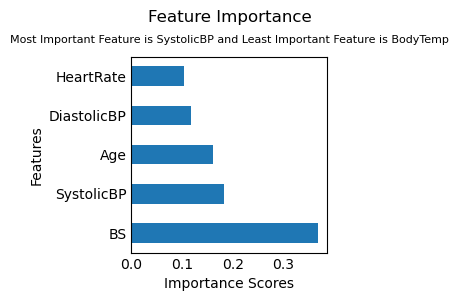

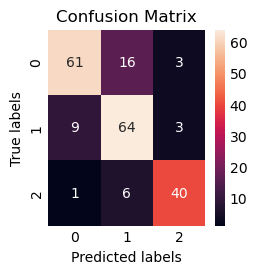

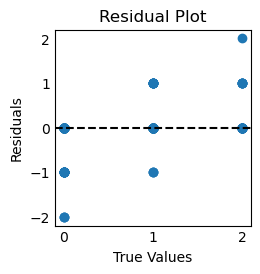

Mean Squared Error: 0.24630541871921183
R-squared: 0.5889356876721206
Mean Absolute Error: 0.20689655172413793


In [29]:
rfc_feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
print(f'Feature Importance Scores:\n{rfc_feature_importances}')

# Plot the feature importances
rfc_feature_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importance', pad=25)
plt.suptitle('Most Important Feature is SystolicBP and Least Important Feature is BodyTemp', y=1.1, fontsize=8)
plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.show()


# Plot the confusion matrix
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_rfc))

In [41]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300,).fit(X_train, y_train)
predictions = gbm.predict(X_test)

accuracy_xgb = accuracy_score(y_test, predictions)
print(f'Accuracy of XGBoost: {accuracy_xgb:0.4f}')

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')